# Water Observatory Data Real-time Study of Water Level Analysis in Dams and Lakes in The World

# Su gözlemevi verileri ile gerçek zamanlı baraj ve göllerdeki su seviyeleri analizi

### Gerekli modülleri import ediyoruz :

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use('Agg')
import urllib.request as request
import json 

### We receive data over the Internet.

### Internet üzerinden verileri alıyoruz.

In [81]:
def bilgiCek(areaID):
    wb_url = 'https://water.blue-dot-observatory.com/api/waterbodies/'+areaID
    with request.urlopen(wb_url) as url:
        wb_data = json.loads(url.read().decode())
        
        return wb_data

### Examination of incoming data

### Gelen verinin incelenmesi

In [82]:
wb_data

[{'country': 'Indonesia',
  'id': 1,
  'lat': -6.921427833493127,
  'long': 107.43212359154722,
  'name': 'Waduk Saguling'},
 {'country': 'Indonesia',
  'id': 2,
  'lat': -8.18296664155867,
  'long': 112.48153982701609,
  'name': 'Karangkates'},
 {'country': 'Indonesia',
  'id': 3,
  'lat': -7.578089331027143,
  'long': 109.78438812878021,
  'name': 'Waduk Wadaslintang'},
 {'country': 'Indonesia',
  'id': 4,
  'lat': -7.7970723941815985,
  'long': 111.63286997319919,
  'name': 'Togo Ngebe'},
 {'country': 'Indonesia',
  'id': 5,
  'lat': -6.737725858946327,
  'long': 107.29897558853891,
  'name': 'Cirata'},
 {'country': 'Indonesia',
  'id': 6,
  'lat': -3.528408136515824,
  'long': 115.07708204335805,
  'name': 'Riam Kanan'},
 {'country': 'Indonesia',
  'id': 7,
  'lat': -7.209774176391377,
  'long': 112.26918934101374,
  'name': 'Gondang'},
 {'country': 'Indonesia',
  'id': 8,
  'lat': -8.1434600018572,
  'long': 112.46810434979963,
  'name': 'Waduk Nglahor'},
 {'country': 'Indonesia',

### We take the incoming data into a table.

### Gelen verileri tablo içine alıyoruz.

In [83]:
df = pd.DataFrame(wb_data)

In [84]:
df.head()

,country,id,lat,long,name
0,Indonesia,1,-6.921428,107.432124,Waduk Saguling
1,Indonesia,2,-8.182967,112.481540,Karangkates
2,Indonesia,3,-7.578089,109.784388,Waduk Wadaslintang
3,Indonesia,4,-7.797072,111.632870,Togo Ngebe
4,Indonesia,5,-6.737726,107.298976,Cirata


### We want the total number of data and number of features of the data we get.

### Elde ettiğimiz verinin toplam veri sayısı ve özellik sayısını istiyoruz.

In [35]:
df.shape

(13151, 5)

### We detect lost data in our data.

### Verimiz içinde kayıp veri tespiti yapıyoruz.

In [36]:
df.isnull().sum()

country    0
id         0
lat        0
long       0
name       0
dtype: int64

### The data we obtained belonged to the whole world. Now it's time to analyze the dam or lake we will choose in our country over the years.

#### NOTE: We will find our country from the data we have obtained, enter the id information and obtain our new data.

### Elde ettiğimiz veriler tüm dünyaya aitti. Şimdi sıra sadece ülkemizde seçeceğimiz baraj veya gölün yıllar içindeki analizini yapmaya.

#### NOT: Elde ettiğimiz veriden ülkemizi bulup id bilgisini girip yeni verimizi elde edeceğiz.

In [56]:
countryID = input("Enter the ID of the country you selected / Seçtiğiniz ülkenin ID bilgisini giriniz : ")

Enter the ID of the country you selected / Seçtiğiniz ülkenin ID bilgisini giriniz : 2386


### I made my choice on the 'SALDA' lake. We will analyze the decrease / increase of Salda lake by years.

### Seçimimi 'SALDA' gölü üzerine yaptım. Salda gölünün yıllara göre azalış / artış analizi yapacağız.

In [96]:
data = bilgiCek(countryID)

In [97]:
data = pd.DataFrame(data['measurements'])

In [114]:
data['date'] = pd.to_numeric(data['date'])

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
cc           227 non-null float64
date         227 non-null int64
level        227 non-null float64
max_level    227 non-null float64
min_level    227 non-null float64
dtypes: float64(4), int64(1)
memory usage: 8.9 KB


#### When we examine our incoming data, we see that there are 227 data and 5 features of this data. We also see that the data is [2015-07-30 - 2022-01-24].

#### Gelen verimizi incelediğimizde 227 veri olduğunu ve bu verimize ait 5 özellik görüyoruz. Aynı zamanda verinin [2015-07-30 - 2022-01-24] olduğunu görüyoruz.

#### Verimizi görselleştiriyoruz.

In [104]:
import seaborn as sbn

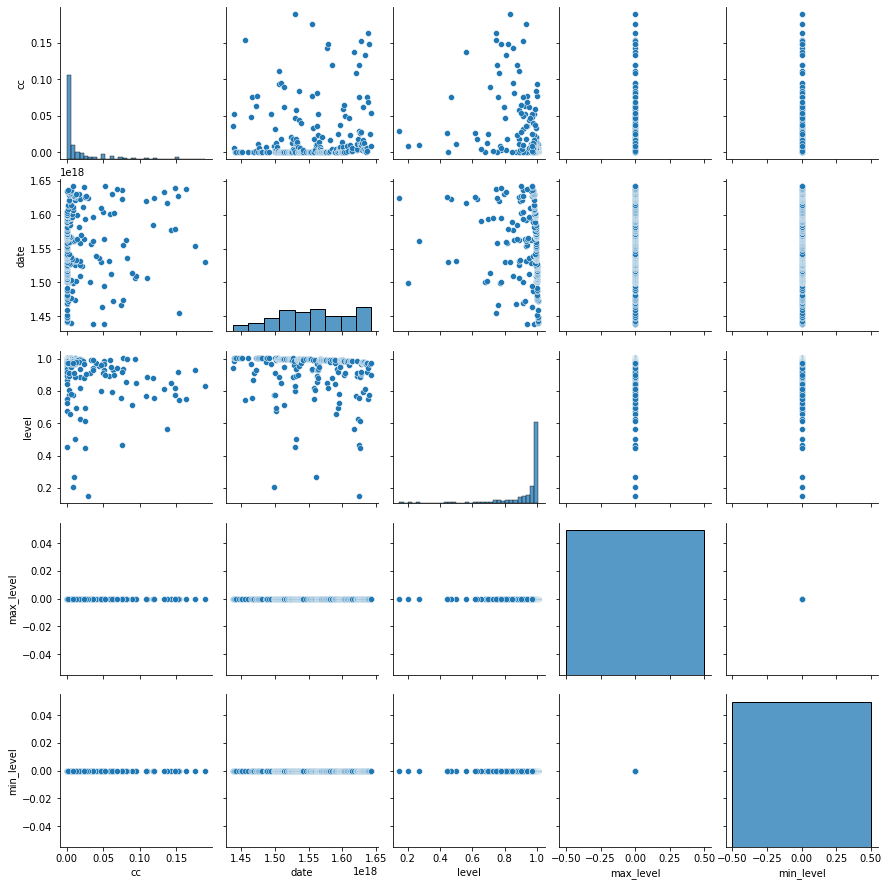

In [126]:
sbn.pairplot(data)

### İnceleme yaptığımız alanın haritasını çıkarma.

In [127]:
from shapely.geometry import shape

In [130]:
area = bilgiCek(countryID)

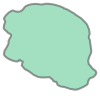

In [131]:
nominal_outline = shape(area['nominal_outline']['geometry'])
nominal_outline